# 데이터를 분석하기 위해 원하는 조건에 따른 그래프를 그리는 함수

In [1]:
import pandas as pd
from matplotlib import dates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# df = pd.read_csv(r'total_dataset.csv', low_memory=False)

In [3]:
# df['Time'] = pd.to_datetime(df['Time'])

In [4]:
# start = '2019-08-12 00:00:00'
# end = '2019-08-13 00:00:00'
# target_sheet = 'SoC'
# # figsize = (20, 8)
# figsize = None
# # ylim = (0, 100)
# ylim = None
# # date_interval = ('min', 30)
# date_interval = (None, 0)

In [5]:
# start = pd.Timestamp(start)
# end = pd.Timestamp(end)
# temp_df = df.loc[:, ['Time', target_sheet, 'Racks']]
# temp_df = temp_df[(start <= temp_df['Time']) & (temp_df['Time'] < end)]

In [6]:
# fig, ax = plt.subplots(figsize=figsize)
# sns.lineplot(data=temp_df, x='Time', y=target_sheet, hue='Racks', ax=ax)

# if date_interval[0] == 'min':
#     ax.xaxis.set_major_locator(dates.MinuteLocator(interval=date_interval[1]))
# elif date_interval[0] == 'hor':
#     ax.xaxis.set_major_locator(dates.HourLocator(interval=date_interval[1]))
# elif date_interval[0] == 'day':
#     ax.xaxis.set_major_locator(dates.DayLocator(interval=date_interval[1]))
# elif date_interval[0] == 'month':
#     ax.xaxis.set_major_locator(dates.MonthLocator(interval=date_interval[1]))

# ax.xaxis.grid(True)

# plt.ylim(ylim)
# plt.xlim((start, end))
# plt.xticks(rotation=60)
# plt.title(str(start) + '~' + str(end) + ' : ' + target_sheet)
# plt.legend(labels=temp_df['Racks'].unique(), loc = 2, bbox_to_anchor = (1,1))

# plt.show()


In [1]:
def select_time_line_plot(df, start, end, target_sheet, figsize=None, ylim=None, date_interval=(None, 0)):
    """
    df: (pandas.DataFrame)
    start: (str) start time
    end: (str) end time
    target_sheet: (str) target sheet name
    figsize: ((int, int)) plot fig size
    ylim: ((int, int)) plot y-limits
    date_interval: (('min'|'hor'|'day'|'month, int)) x-axis tick spacing
    """

    start = pd.Timestamp(start)
    end = pd.Timestamp(end)
    temp_df = df.loc[:, ['Time', target_sheet, 'Racks']]
    temp_df = temp_df[(start <= temp_df['Time']) & (temp_df['Time'] < end)]

    fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(data=temp_df, x='Time', y=target_sheet, hue='Racks', ax=ax, legend=False)

    if date_interval[0] == 'min':
        ax.xaxis.set_major_locator(dates.MinuteLocator(interval=date_interval[1]))
    elif date_interval[0] == 'hor':
        ax.xaxis.set_major_locator(dates.HourLocator(interval=date_interval[1]))
    elif date_interval[0] == 'day':
        ax.xaxis.set_major_locator(dates.DayLocator(interval=date_interval[1]))
    elif date_interval[0] == 'month':
        ax.xaxis.set_major_locator(dates.MonthLocator(interval=date_interval[1]))

    ax.xaxis.grid(True)

    plt.ylim(ylim)
    plt.xlim((start, end))
    plt.xticks(rotation=60)
    plt.title(str(start) + '~' + str(end) + ' : ' + target_sheet)
    plt.legend(labels=temp_df['Racks'].unique(), loc = 2, bbox_to_anchor = (1,1))

    plt.show()

In [8]:
# df = pd.read_csv(r'total_dataset.csv', low_memory=False)
df = pd.read_csv(r'dataset\racks_f_total_dataset.csv', dtype={'EvtVnd1': object, 'EvtVnd2': object, 'EvtVnd3': object})
# df = pd.read_csv(r'dataset\racks_a_total_dataset.csv', dtype={'EvtVnd1': object, 'EvtVnd2': object, 'EvtVnd3': object})

In [9]:
df['Time'] = pd.to_datetime(df['Time'])

In [10]:
start = '2019-05-01 00:00:00'
end = '2019-07-01 00:00:00'
target_sheet = 'Tmp'

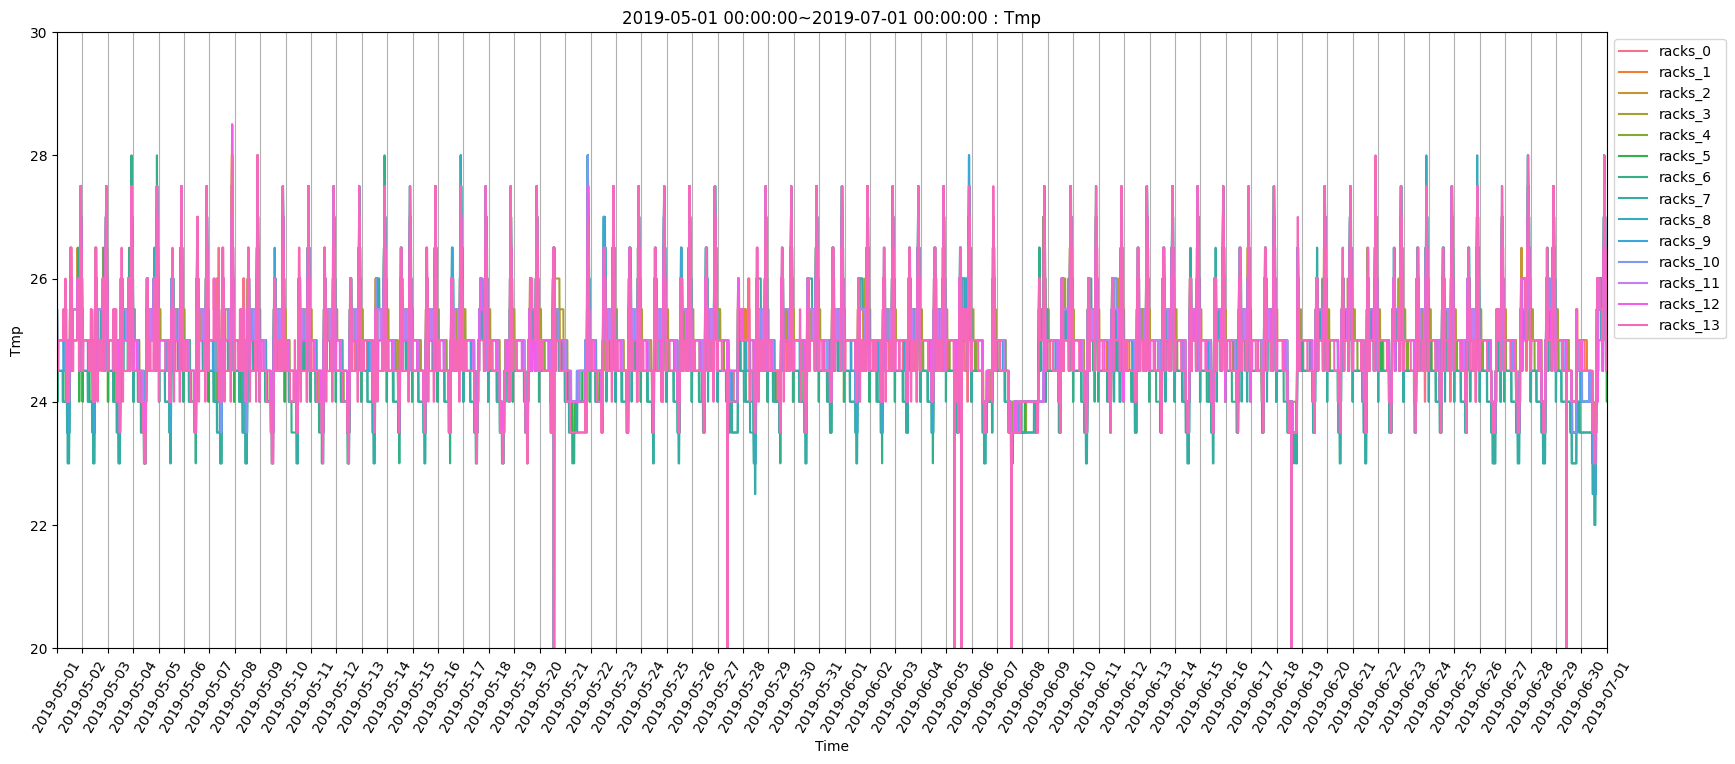

In [11]:
select_time_line_plot(df, start, end, target_sheet, figsize=(20, 8), ylim=(20, 30), date_interval=('day', 1))